In [75]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

# HOME DIRECTION
data_mondays = pd.read_excel('C:/Users/ERIC/Desktop/T_S_Analysis/PML HISTÓRICO PARA EL NODO 01OTM-230 (OTUMBA MANIOBRAS) (1).xlsm', 2)

# ALL DATA
data_mondays = pd.DataFrame(data_mondays)
# DATA FROM 2017
data_17 = data_mondays.iloc[:, 1:25].values
data_17 = pd.DataFrame(data_17)

# DATA FROM 2018
data_18 = data_mondays.iloc[:, 26:50].values
data_18 = pd.DataFrame(data_18)

# DATA FROM 2019
data_19 = data_mondays.iloc[:, 51:75].values
data_19 = pd.DataFrame(data_19)
data_17.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,810.26,697.78,634.31,623.34,621.21,622.02,643.50,785.46,860.57,1104.83,...,1248.96,1267.67,1265.75,1231.92,1213.59,1231.42,1256.39,1235.27,1187.54,949.56
1,573.87,561.65,548.03,535.81,535.42,563.18,596.98,710.10,811.16,925.80,...,1068.82,1020.24,1015.01,1062.46,1005.40,1055.55,1080.12,1065.64,907.26,722.85
2,640.97,576.46,573.04,568.79,569.60,579.65,648.30,803.67,940.19,1283.74,...,1680.14,1661.22,1638.34,1592.61,1673.26,1849.07,1656.75,1653.64,1427.91,976.70
3,603.05,575.03,557.71,554.02,552.53,558.51,654.51,764.16,842.69,1122.25,...,1461.47,1523.85,1391.03,1439.68,1531.11,1615.50,1588.72,1530.74,1220.02,825.63
4,572.48,553.22,548.22,537.84,540.99,552.58,620.28,705.11,815.08,926.64,...,1175.71,1154.09,1156.97,1074.76,1097.21,1109.19,1095.54,1071.24,975.05,737.36


In [71]:
# AUTOCORRELATION FOR ALL THE HOURS, ALL MONDAYS IN THE 3 YEARS
autocorr = []
daily_diff = data_17.diff(axis = 0, periods = 1)
for i in range(24):
    autocorr.append(daily_diff[i].autocorr())

# Change the column '0' to 'Autocorrelation'
autocorr = pd.DataFrame(autocorr)
autocorr.columns = ['Autocorrelation']
#All the autocorrelations are mean reverted
#autocorr


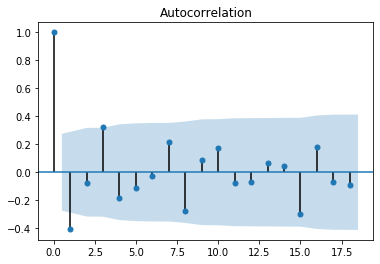

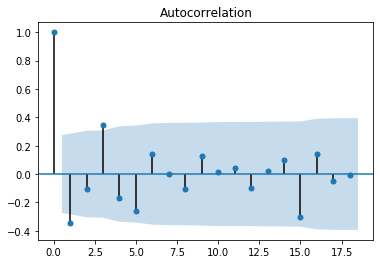

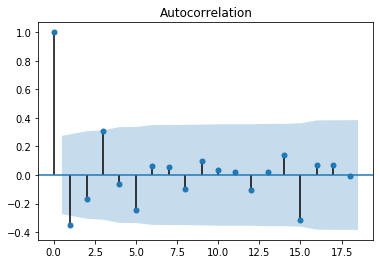

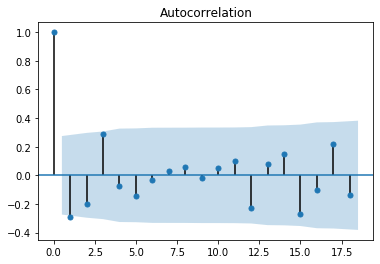

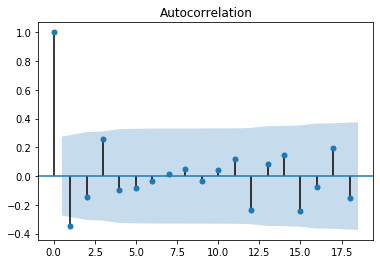

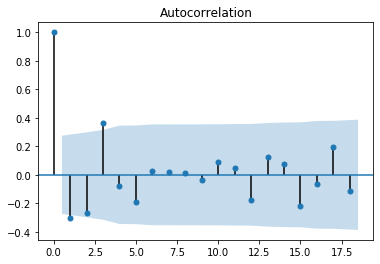

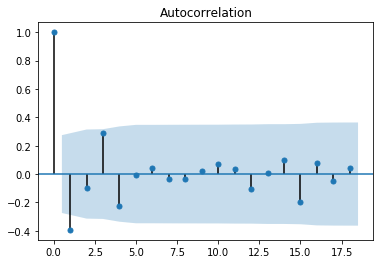

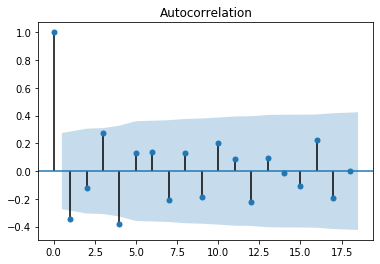

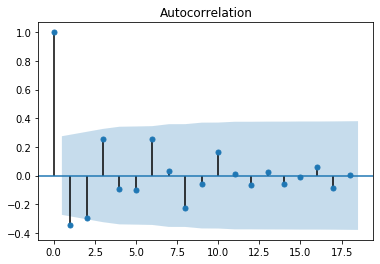

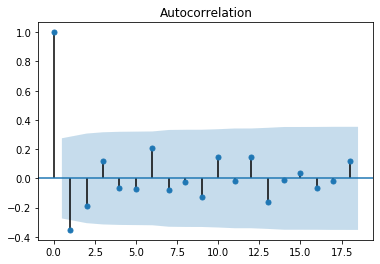

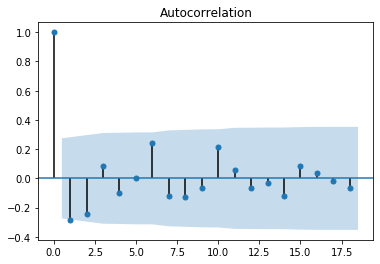

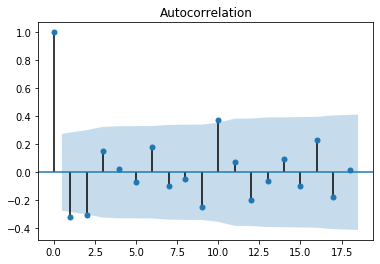

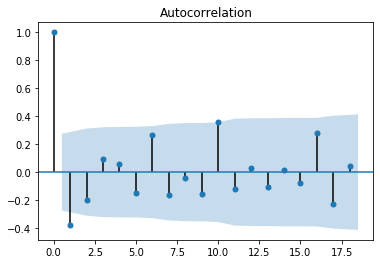

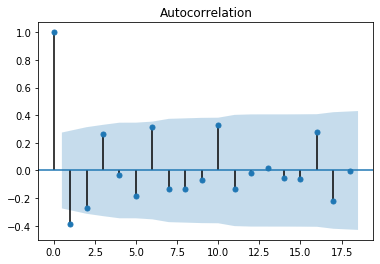

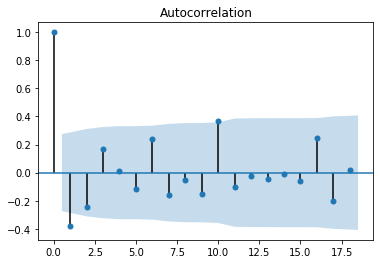

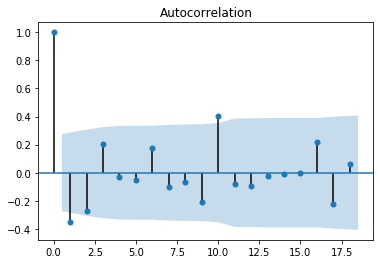

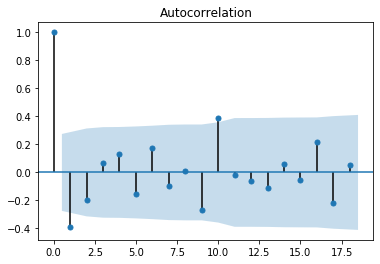

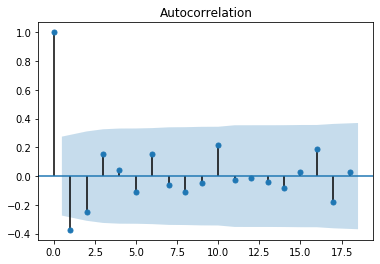

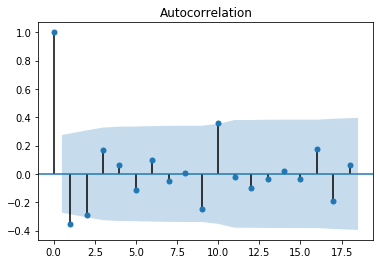

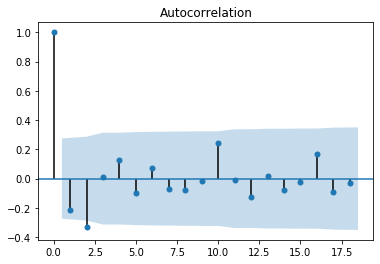

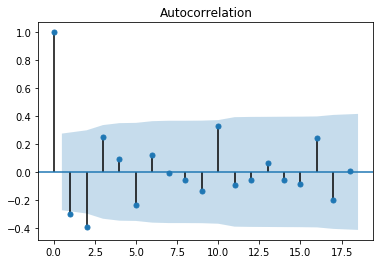

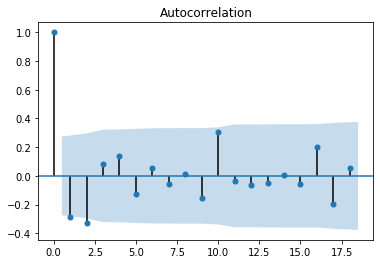

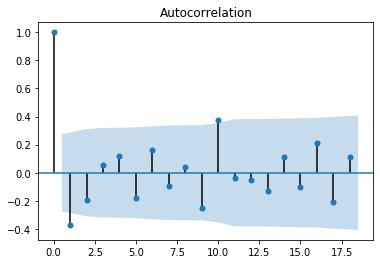

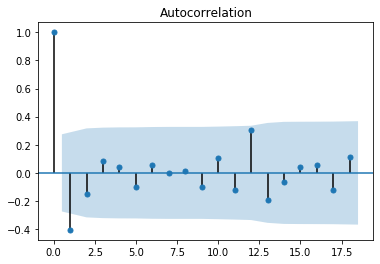

In [89]:
for i in range(24):
    daily_diff = daily_diff.dropna()
    plot_acf(daily_diff[i])
    plt.show()


In [100]:
# Run the ADF test on the price series and print out the results
# if p<0.05 we can reject the hypothesis that series is a random walk
results = []
for i in range(24):
    data_ret = data_17[i].pct_change()
    data_ret = data_ret.dropna()
    res = adfuller(data_ret)
    results.append(res[1])
results = pd.DataFrame(results)    